## Task 3 : Prediction using Decision Tree Algorithm

**Objective** : For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it
graphically.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://github.com/yatishpateldu/Spark-Foundation/blob/main/Task%202/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [5]:
# Column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## 2-D Scatter Plot

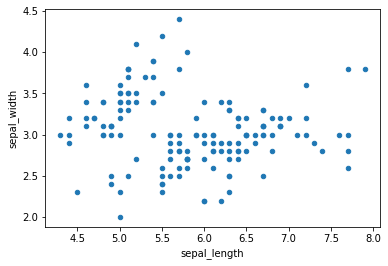

In [7]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

D:\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


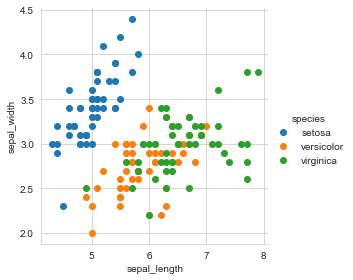

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

## Pair-plot

D:\Python\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


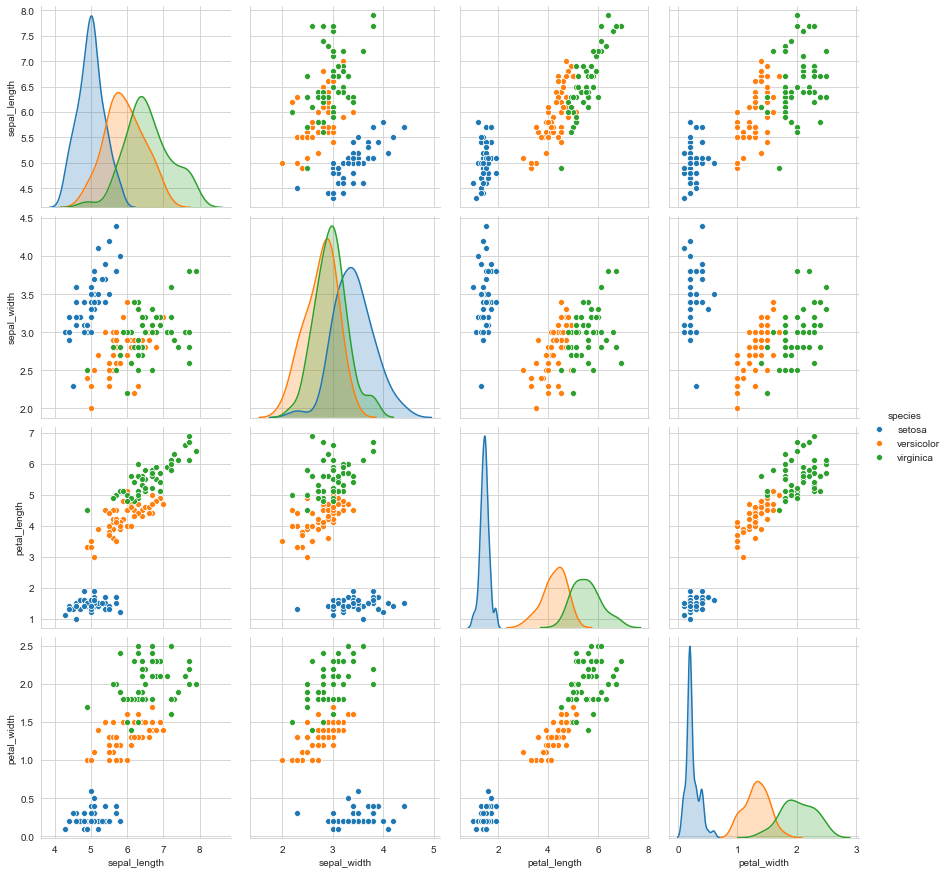

In [9]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## Histogram with Distribution plot.

D:\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


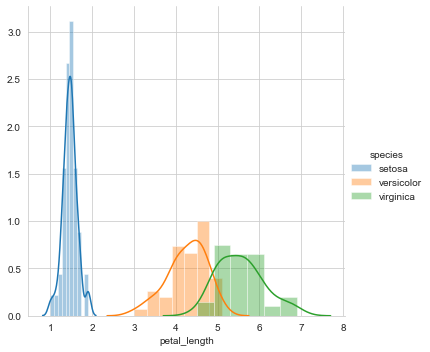

In [10]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

D:\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


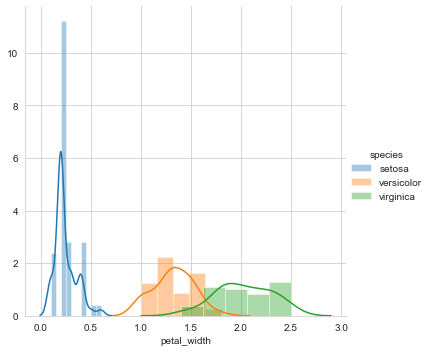

In [11]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

D:\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


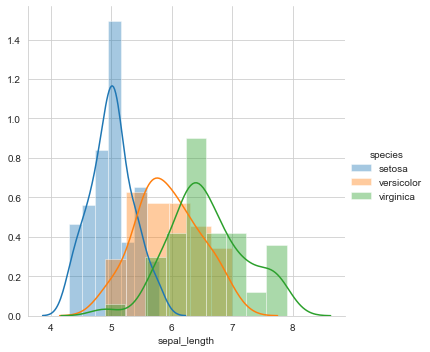

In [12]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

D:\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


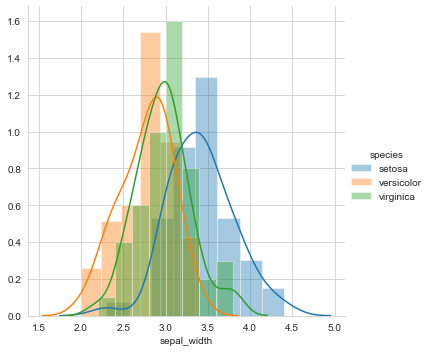

In [13]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

### **Preparing the data**

In [14]:
from sklearn.preprocessing import LabelEncoder                 # Converting categorical column into numerical
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)

In [15]:
X = iris.iloc[:, :-1] 
y = iris.iloc[:, 4] 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Classifier**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Making Predictions
Now that we have trained our classifier, it's time to make some predictions

In [18]:
from sklearn.metrics import r2_score
y_train_pred = dtree.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train, y_train_pred) )
y_test_pred = dtree.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test, y_test_pred) )
print()

R2 score of Training Data: 1.0
R2 score of Testing Data: 1.0



## Visualize Graphically.

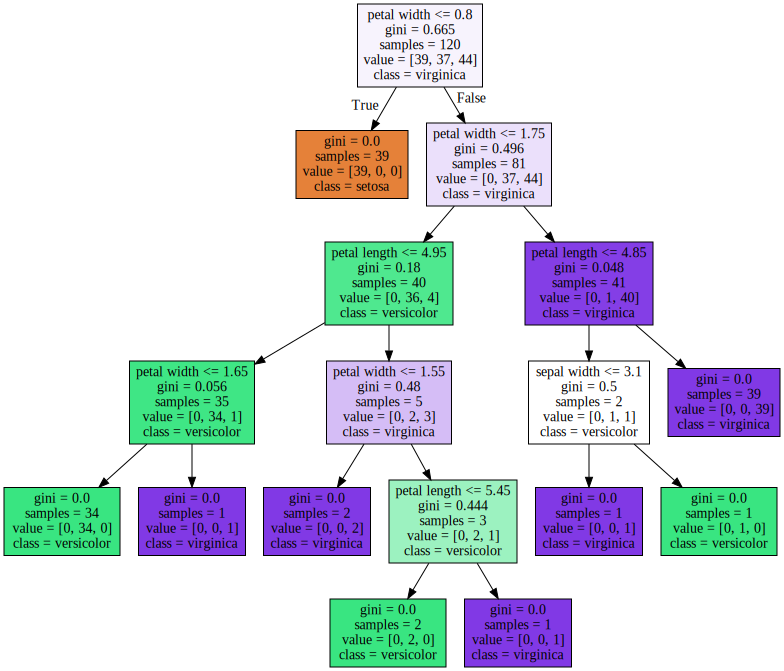

In [19]:
# Import necessary libraries for graph viz
from sklearn import tree  
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

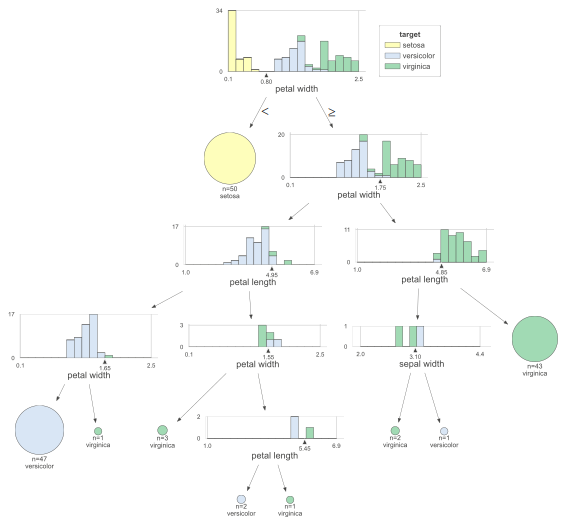

In [20]:
from dtreeviz.trees import dtreeviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
viz = dtreeviz(dtree, X, y,
                target_name="target",
                feature_names=fn,
                class_names=cn)
viz